In [1]:
# %run ./footprint_v_biocapacity.ipynb
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats

filepath = "Resources/countries.csv"
eco_csv = pd.read_csv(filepath, header=0)

# Countries Ranked by Bio Reserve or Deficit

In [2]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

In [3]:
# New dataframe with only Footprint and Biocapacity Reserve/Deficit
my_df = pd.DataFrame(eco_csv.iloc[:,[0,1,2,17,5,6,7,8,9,10,11,12,13,14,15,16]])

new_col = my_df['Biocapacity Deficit or Reserve']/my_df['Total Biocapacity'] * 100
my_df.insert(loc=4, column='Bio Deficit or Reserve %', value=new_col)
my_df['Bio Deficit or Reserve %'] = my_df['Bio Deficit or Reserve %'].map('{:.1f}%'.format)

eco_sort = my_df.sort_values('Biocapacity Deficit or Reserve', ascending=False)
eco_sort.reset_index(inplace=True, drop=True)
eco_sort

,Country,Region,Population (millions),Biocapacity Deficit or Reserve,Bio Deficit or Reserve %,Cropland Footprint,Grazing Footprint,Forest Footprint,Carbon Footprint,Fish Footprint,Total Ecological Footprint,Cropland,Grazing Land,Forest Land,Fishing Water,Urban Land,Total Biocapacity
0,French Guiana,Latin America,0.240,109.01,97.9%,0.07,0.06,0.46,1.58,0.17,2.34,0.07,0.06,95.16,16.07,0.00,111.35
1,Suriname,Latin America,0.540,85.08,95.2%,0.43,0.06,0.52,3.01,0.14,4.25,0.30,0.03,81.52,7.39,0.09,89.33
2,Guyana,Latin America,0.800,63.51,95.4%,0.70,0.22,0.77,1.25,0.06,3.07,0.69,1.51,59.19,5.12,0.06,66.58
3,Gabon,Africa,1.630,24.29,92.3%,0.53,0.13,0.79,0.43,0.11,2.02,0.25,3.60,19.50,2.93,0.03,26.31
4,Bolivia,Latin America,10.500,13.77,82.3%,0.37,1.69,0.17,0.67,0.01,2.96,0.59,2.18,13.86,0.05,0.06,16.73
5,Congo,Africa,4.340,9.63,88.3%,0.22,0.09,0.38,0.47,0.10,1.29,0.13,3.06,7.33,0.35,0.03,10.91
6,Mongolia,Asia-Pacific,2.800,9.58,61.2%,0.29,3.47,0.17,2.09,0.00,6.08,0.21,8.23,7.03,0.14,0.05,15.66
7,Canada,North America,34.840,7.83,48.9%,1.46,0.33,1.20,5.00,0.12,8.17,3.11,0.29,9.12,3.41,0.07,16.01
8,Finland,European Union,5.410,7.57,56.3%,NaN,NaN,NaN,NaN,NaN,5.87,NaN,NaN,NaN,NaN,NaN,13.44
9,Uruguay,Latin America,3.400,7.41,71.8%,0.19,0.98,0.55,0.98,0.05,2.91,1.89,4.86,1.22,2.18,0.17,10.32


In [4]:
# # How U.S. ranks
# index_us = eco_sort.loc[eco_sort["Country"] == "United States of America",:]
# index_us

In [5]:
# # Countries with a Biocapacity Reserve
# reserves = eco_sort.loc[eco_sort["Biocapacity Deficit or Reserve"] >= 0]
# reserves = reserves['Country'].tolist()
# reserves_count = len(reserves)
# reserves

# Country Population v. Bio Deficit or Reserve

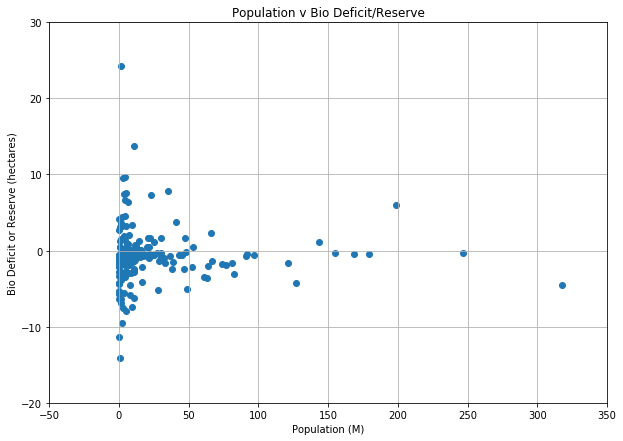

Note: Two countries with outlier populations (> 350M), China and India, were not included on this graph. However their data is in the dataframe below. Three countries with outlier Bio Reserves (> 30 hectares) - French Guiana, and Suriname and Guyana (all in Latin America) - were also not included. Their data is included in the dataframe above. They have low populations of less than 1 million.


In [6]:
population = eco_sort['Population (millions)']
deficit_reserve = eco_sort['Biocapacity Deficit or Reserve']
fig, ax = plt.subplots(figsize=(10,7))
plt.scatter(population, deficit_reserve)
plt.xlim(-50,350,50)
plt.ylim(-20,30,10)
plt.title('Population v Bio Deficit/Reserve')
plt.xlabel('Population (M)')
plt.ylabel('Bio Deficit or Reserve (hectares)')
plt.grid()
plt.show()
print("Note: Two countries with outlier populations (> 350M), China and India, were not included on this graph. However their data is in the dataframe below. Three countries with outlier Bio Reserves (> 30 hectares) - French Guiana, and Suriname and Guyana (all in Latin America) - were also not included. Their data is included in the dataframe above. They have low populations of less than 1 million.")

In [7]:
pop_sort = eco_sort.sort_values('Population (millions)', ascending=False)
pop_sort.head(3)

,Country,Region,Population (millions),Biocapacity Deficit or Reserve,Bio Deficit or Reserve %,Cropland Footprint,Grazing Footprint,Forest Footprint,Carbon Footprint,Fish Footprint,Total Ecological Footprint,Cropland,Grazing Land,Forest Land,Fishing Water,Urban Land,Total Biocapacity
148,China,Asia-Pacific,1408.04,-2.44,-259.6%,0.55,0.13,0.19,2.32,0.08,3.38,0.46,0.10,0.22,0.04,0.12,0.94
92,India,Asia-Pacific,1236.69,-0.71,-157.8%,0.34,0.01,0.14,0.61,0.02,1.16,0.35,0.00,0.02,0.03,0.05,0.45
170,United States of America,North America,317.50,-4.46,-118.6%,1.13,0.30,0.67,5.90,0.12,8.22,1.49,0.28,1.57,0.33,0.09,3.76


# Global Region Totals

In [8]:
# New dataframe with Region Totals
region_sum = eco_sort.groupby('Region').sum()

# Create row with Global Totals for later use
region_cols = region_sum.keys().tolist()
global_sum = []

for col in range(len(region_cols)):
    global_sum.append(region_sum.iloc[:,col].sum())

# Recalculate last columns based on new data
new_col = region_sum['Biocapacity Deficit or Reserve']/region_sum['Total Biocapacity'] * 100
region_sum.insert(loc=2, column='Bio Deficit or Reserve %', value=new_col)
region_sum['Bio Deficit or Reserve %'] = region_sum['Bio Deficit or Reserve %'].map('{:.1f}%'.format)
region_sum

# New dataframe with Global Totals
global_totals = region_sum
global_percent = "{:.1%}".format(global_sum[1]/global_sum[13])   # make sure these values are still correct if Region Dataframe ever changes
global_sum.insert(2, global_percent)
global_totals.loc['Global Totals'] = global_sum
global_totals

# # New dataframe with Global Totals
# global_totals = pd.DataFrame([global_sum], columns=region_cols)
# global_totals.rename(index = {0: "Global Totals"}, inplace=True)

# # Recalculate last columns based on new data
# new_col = global_totals['Biocapacity Deficit or Reserve']/global_totals['Total Biocapacity'] * 100
# global_totals.insert(loc=2, column='Bio Deficit or Reserve %', value=new_col)
# global_totals['Bio Deficit or Reserve %'] = global_totals['Bio Deficit or Reserve %'].map('{:.1f}%'.format)
# global_totals

,Population (millions),Biocapacity Deficit or Reserve,Bio Deficit or Reserve %,Cropland Footprint,Grazing Footprint,Forest Footprint,Carbon Footprint,Fish Footprint,Total Ecological Footprint,Cropland,Grazing Land,Forest Land,Fishing Water,Urban Land,Total Biocapacity
Region,,,,,,,,,,,,,,,
Africa,1034.640,30.78,26.2%,19.48,11.48,15.50,29.04,4.69,86.89,15.20,29.78,51.11,18.19,1.98,117.66
Asia-Pacific,3880.170,-4.72,-5.1%,17.96,7.97,11.22,45.42,6.97,98.02,16.51,18.07,35.48,18.09,2.29,93.29
European Union,503.980,-47.50,-50.1%,23.59,6.25,15.40,78.34,2.78,142.36,25.96,2.92,29.36,9.39,3.25,94.87
Latin America,605.410,237.14,63.6%,14.85,12.57,11.91,56.41,4.37,135.87,15.26,19.18,282.18,46.42,1.80,372.98
Middle East/Central Asia,405.586,-70.87,-316.2%,13.77,4.87,3.70,67.82,1.48,93.25,6.92,6.52,2.28,5.09,1.58,22.41
North America,352.400,-2.27,-11.4%,2.59,0.63,1.87,10.90,0.24,22.16,4.60,0.57,10.69,3.74,0.16,19.90
Northern/Eastern Europe,238.180,-10.57,-30.6%,7.79,1.76,5.07,24.32,0.66,45.16,7.56,1.95,14.34,2.04,0.55,34.59
Global Totals,7020.366,131.99,17.5%,100.03,45.53,64.67,312.25,21.19,623.71,92.01,78.99,425.44,102.96,11.61,755.70


# Global Region Biocapacities

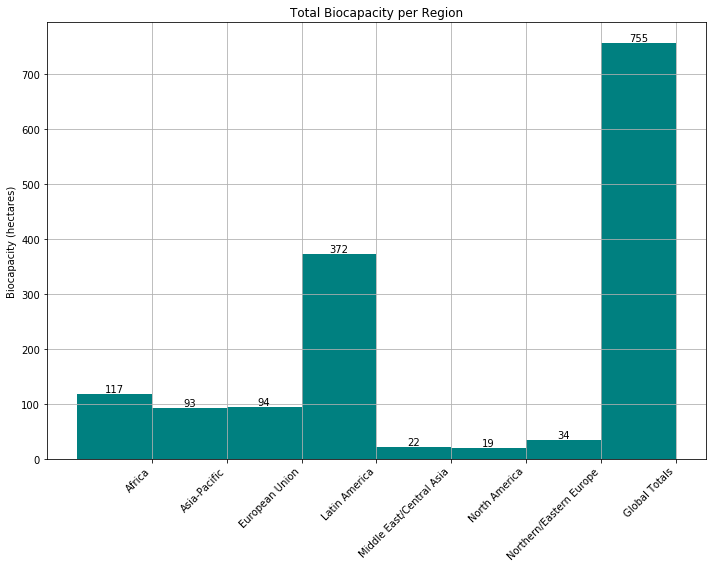

In [9]:
# Data lists
region_list = region_sum.index.tolist()
total_capacity = region_sum['Total Biocapacity'].tolist()

# Set up axes and labels
fig, ax = plt.subplots(figsize=(10,8))
x_ticks = np.arange(len(region_list))
ax.set_xticks(x_ticks)
ax.set_xticklabels(region_list, rotation=45, horizontalalignment='right')
plt.grid()

plt.title('Total Biocapacity per Region')
plt.ylabel('Biocapacity (hectares)')

# Function to label the bars
def autolabel(rects):
    for rect in rects:
        bar_height = rect.get_height()
        label_va = bar_height + 3

        ax.text(rect.get_x() + rect.get_width()/2, label_va,
            str(int(bar_height)), ha='center')
        
# Plot the chart
bar_format = ax.bar(x_ticks - 0.5, total_capacity, width=1.0, color='teal')

# Call function to label the bars
autolabel(bar_format)

# Save and show the figure
plt.tight_layout()
plt.savefig('Images/bio-capacity.png')
plt.show()


# Global Region Footprints

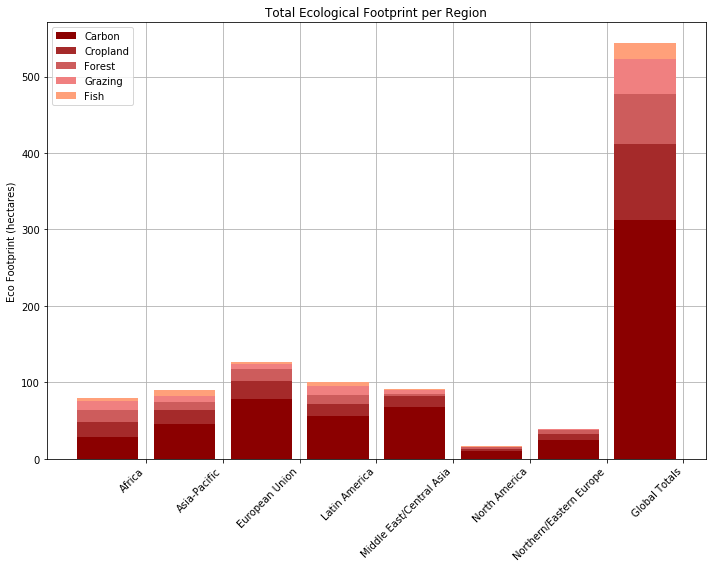

In [10]:
# Data lists
carbon_foot = region_sum['Carbon Footprint']
crop_foot = region_sum['Cropland Footprint']
forest_foot = region_sum['Forest Footprint']
grazing_foot = region_sum['Grazing Footprint']
fish_foot = region_sum['Fish Footprint']

# Set up axes and labels
fig, ax = plt.subplots(figsize=(10,8))
x_ticks = np.arange(len(region_list))
ax.set_xticks(x_ticks)
ax.set_xticklabels(region_list, rotation=45, horizontalalignment='right')
plt.grid(zorder=0)
plt.title('Total Ecological Footprint per Region')
plt.ylabel('Eco Footprint (hectares)')

# Calculate the bottoms of each stacked bar
crop_bottom = carbon_foot
forest_bottom = np.add(carbon_foot, crop_foot)
grazing_bottom = np.add(forest_bottom, forest_foot)
fish_bottom = np.add(grazing_bottom, grazing_foot)

# Plot the stacked bar chart
carbon_bar = plt.bar(x_ticks-0.5, carbon_foot, width=0.8, color='darkred', zorder=2)
crop_bar = plt.bar(x_ticks-0.5, crop_foot, width=0.8, bottom=crop_bottom, color='brown', zorder=2)
forest_bar = plt.bar(x_ticks-0.5, forest_foot, width=0.8, bottom=forest_bottom, color='indianred', zorder=2)
grazing_bar = plt.bar(x_ticks-0.5, grazing_foot, width=0.8, bottom=grazing_bottom, color='lightcoral', zorder=2)
fish_bar = plt.bar(x_ticks-0.5, fish_foot, width=0.8, bottom=fish_bottom, color='lightsalmon', zorder=2)

plt.legend((carbon_bar, crop_bar, forest_bar, grazing_bar, fish_bar), ('Carbon', 'Cropland', 'Forest', 'Grazing', 'Fish'))

# Save and show the figure
plt.tight_layout()
plt.savefig('Images/total_footprint.png')
plt.show()


In [11]:
print("North America has an overall low footprint but that's because Canada's Reserve compensates for the U.S.'s Deficit.")
na_countries = eco_sort.loc[eco_sort["Region"] == "North America",:]
na_countries

North America has an overall low footprint but that's because Canada's Reserve compensates for the U.S.'s Deficit.


,Country,Region,Population (millions),Biocapacity Deficit or Reserve,Bio Deficit or Reserve %,Cropland Footprint,Grazing Footprint,Forest Footprint,Carbon Footprint,Fish Footprint,Total Ecological Footprint,Cropland,Grazing Land,Forest Land,Fishing Water,Urban Land,Total Biocapacity
7,Canada,North America,34.84,7.83,48.9%,1.46,0.33,1.20,5.0,0.12,8.17,3.11,0.29,9.12,3.41,0.07,16.01
170,United States of America,North America,317.50,-4.46,-118.6%,1.13,0.30,0.67,5.9,0.12,8.22,1.49,0.28,1.57,0.33,0.09,3.76
176,Bermuda,North America,0.06,-5.64,-4338.5%,NaN,NaN,NaN,NaN,NaN,5.77,NaN,NaN,NaN,NaN,NaN,0.13


# Global Region Bio Reserve or Deficit

In [12]:
# New dataframe with Bio Deficits or Reserves only
region_landuse = pd.DataFrame({
    'Population (millions)' : region_sum['Population (millions)'],
    'Total Biocapacity' : region_sum['Total Biocapacity'],
    'Cropland Deficit or Reserve' : region_sum['Cropland'] - region_sum['Cropland Footprint'],
    'Grazing Deficit or Reserve' : region_sum['Grazing Land'] - region_sum['Grazing Footprint'],
    'Forest Deficit or Reserve' : region_sum['Forest Land'] - region_sum['Forest Footprint'],
    'Fish Deficit or Reserve' : region_sum['Fishing Water'] - region_sum['Fish Footprint'],
    'Carbon Deficit or Reserve' : region_sum['Urban Land'] - region_sum['Carbon Footprint'],
    'Total Bio Deficit or Reserve' : region_sum['Biocapacity Deficit or Reserve'],
    'Bio Deficit or Reserve %' : region_sum['Bio Deficit or Reserve %'],
})

# Conditional color formatting
def highlight_pos(value):
    is_pos = value >= 0
    return ['background-color: teal' if v else 'background-color: lightcoral' for v in is_pos]

df_slice = pd.IndexSlice[:, 'Cropland Deficit or Reserve':'Total Bio Deficit or Reserve']
region_landuse.style.apply(highlight_pos, subset = df_slice)


,Population (millions),Total Biocapacity,Cropland Deficit or Reserve,Grazing Deficit or Reserve,Forest Deficit or Reserve,Fish Deficit or Reserve,Carbon Deficit or Reserve,Total Bio Deficit or Reserve,Bio Deficit or Reserve %
Region,,,,,,,,,
Africa,1034.64,117.66,-4.28,18.3,35.61,13.5,-27.06,30.78,26.2%
Asia-Pacific,3880.17,93.29,-1.45,10.1,24.26,11.12,-43.13,-4.72,-5.1%
European Union,503.98,94.87,2.37,-3.33,13.96,6.61,-75.09,-47.5,-50.1%
Latin America,605.41,372.98,0.41,6.61,270.27,42.05,-54.61,237.14,63.6%
Middle East/Central Asia,405.586,22.41,-6.85,1.65,-1.42,3.61,-66.24,-70.87,-316.2%
North America,352.4,19.9,2.01,-0.06,8.82,3.5,-10.74,-2.27,-11.4%
Northern/Eastern Europe,238.18,34.59,-0.23,0.19,9.27,1.38,-23.77,-10.57,-30.6%
Global Totals,7020.37,755.7,-8.02,33.46,360.77,81.77,-300.64,131.99,17.5%


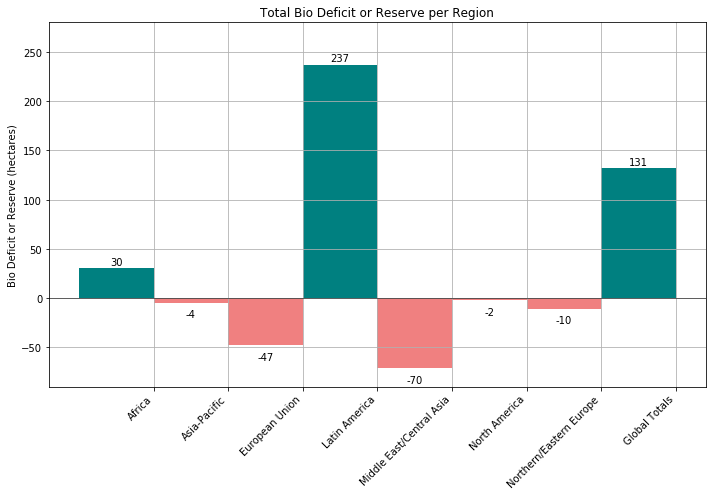

In [13]:
# Data lists
region_list = region_landuse.index.tolist()
total_deficit = region_landuse['Total Bio Deficit or Reserve'].tolist()

# Set up axes  and labels
fig, ax = plt.subplots(figsize=(10,7))
x_ticks = np.arange(len(region_list))
ax.set_xticks(x_ticks)
ax.set_xticklabels(region_list, rotation=45, horizontalalignment='right')
plt.ylim(-90,280,50)
plt.grid()
plt.axhline(linewidth=0.5, color='black')

plt.title('Total Bio Deficit or Reserve per Region')
plt.ylabel('Bio Deficit or Reserve (hectares)')

# Function to label the bars
def autolabel(rects):
    for rect in rects:
        bar_height = rect.get_height()
        
        # Formatting if bar is negative or positive
        if bar_height >= 0:
            label_va = bar_height + 3
        else:
            label_va = bar_height - 15

        ax.text(rect.get_x() + rect.get_width()/2, label_va,
            str(int(bar_height)), ha='center')

# Color the bars        
bar_color = []
for change in total_deficit:
    if change <= 0:
        bar_color.append('lightcoral')
    else:
        bar_color.append('teal')
        
# Plot the chart
bar_format = ax.bar(x_ticks - 0.5, total_deficit, width=1.0, color=bar_color)

# Call function to label the bars
autolabel(bar_format)

# Save and show the figure
plt.tight_layout()
plt.savefig('Images/bio-deficit-reserve.png')
plt.show()


## Data Source
https://www.kaggle.com/footprintnetwork/ecological-footprint/
<br>This data set represents only the year 2016.

## Definitions
hectare: a metric unit of square measure, equal to 100 ares (2.471 acres or 10,000 square meters).

# Initial Observations
1. Most countries actually have a Biocapacity Reserve from many of their land types but they have a Total Biocapacity Deficit because their Carbon Footprint and/or Carbon Deficit is high. Carbon Footprint primarily comes from Urban Land, which means Urban Land requires a lot of resources and produces a lot of waste. The other Natural Land Types mostly have a reserve because they produce a lot of resources while producing little waste.
<br>**Note:** These charts do not necessarily indicate the push and pull of resources between land types or countries. For example, Urban Land has a Biocapacity Deficit but it is able to maintain because it is likely pulling resources from a land type with a Biocapacity Reserve. The same concept goes for countries with a Biocapacity Deficit pulling resources from countries with a Biocapacity Reserve.<br><br>

2. Latin America and Africa have a Biocapacity Reserve meaning they are using their ecological resources under capacity. Meanwhile all other regions have a Biocapacity Deficit meaning they are overusing their ecological resources, especially Middle East/Central Asia. This may have to do with having relatively high or low Total Biocapacity to begin with, respectively.<br><br>

3. Regions that have low capacity now may be due to several previous years of Biodeficit which can drain a region's resources. Many of them include "developed" countries while the regions with high capacity (for now) are actually "underdeveloped" countries.

**Note:** Total Deficit or Reserve may include some Land Types in its calculation but are not included in the original CSV. Also, Ecological Footprint is not all necessarily from human activity. It could come from animal, water, weather, land or many other types of activity.
